# Application du CNN sur la base MNIST pour la reconnaissance de caractères

Ce notebook présente l'application d'un CNN (Convolutional Neural Network) sur la base de données MNIST pour la reconnaissance de caractères écrits à la main. Les étapes incluent le chargement des données, l'exploration des données, la construction et l'entraînement du modèle, l'évaluation des performances et l'affichage des prédictions sur les données de test.



## **Étape 1**: Importation des bibliothèques nécessaires

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.12.0'

## **Étape 2**: Chargement des données MNIST
La base de données MNIST contient des images de chiffres écrits à la main (de 0 à 9).
Nous utilisons la fonction mnist.load_data() pour télécharger et charger les données.
Les données sont divisées en un ensemble d'entraînement et un ensemble de test.

In [3]:
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## **Étape 3**: Exploration des données
Avant de commencer le traitement des données, il est utile d'explorer leur structure.
Nous vérifions les formes (shapes) des données d'entraînement et de test pour nous assurer de leur cohérence.

In [4]:
# Exploration des données
print('Shape des données d\'entraînement:', x_train.shape)
print('Shape des étiquettes d\'entraînement:', y_train.shape)
print('Shape des données de test:', x_test.shape)
print('Shape des étiquettes de test:', y_test.shape)

Shape des données d'entraînement: (60000, 28, 28)
Shape des étiquettes d'entraînement: (60000,)
Shape des données de test: (10000, 28, 28)
Shape des étiquettes de test: (10000,)


## **Étape 4**: Affichage de quelques exemples d'images

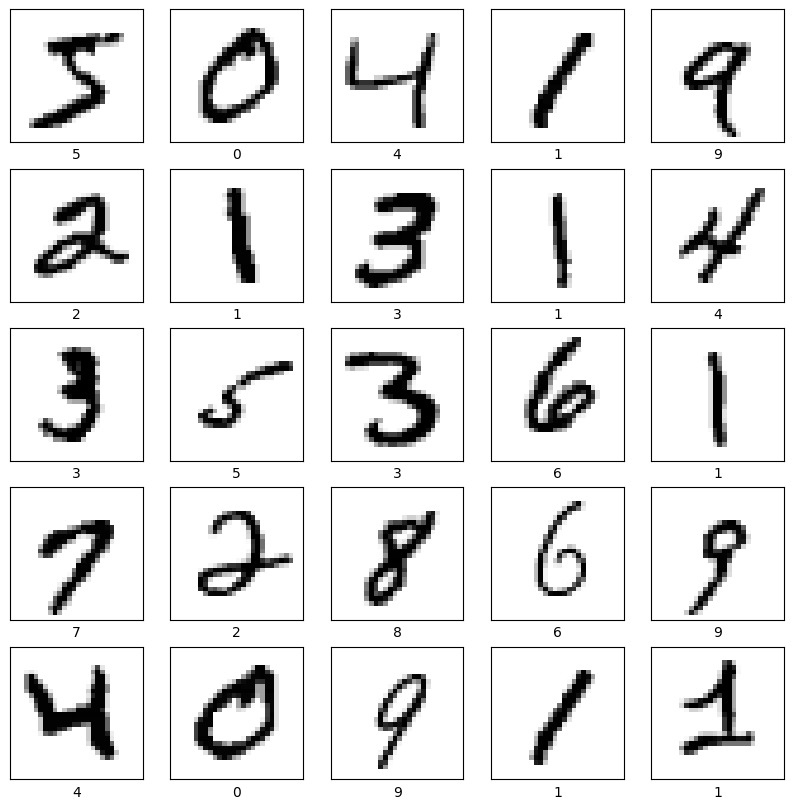

In [5]:
# Affichage de quelques exemples d'images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_train[i]))
plt.show()

## **Étape 5**: Prétraitement des données
Avant de pouvoir utiliser les données pour entraîner notre modèle CNN, nous devons les prétraiter.
Dans ce cas, nous remodelons les images en un format adapté à l'entrée du modèle et nous les normalisons.

In [6]:
# Prétraitement des données
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

## **Étape 6** :Construction du modèle CNN
Nous utilisons la classe Sequential de Keras pour construire notre modèle CNN.
Nous ajoutons des couches de convolution, de pooling et de couches entièrement connectées (dense) pour former le modèle.

In [7]:
# Construction du modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## **Étape 7**: Compilation du modèle
Nous compilons le modèle avec les options d'optimisation, de perte et de métrique appropriées.

In [8]:
# Compilation du modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **Étape 8**: Entraînement du modèle
Nous entraînons le modèle en utilisant les données d'entraînement.
Nous spécifions le nombre d'époques d'entraînement et la taille du lot (batch size).
Nous utilisons également une fraction des données d'entraînement comme validation_split pour évaluer les performances du modèle pendant l'entraînement.

In [9]:
# Entraînement du modèle
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 39s 22ms/step - loss: 0.1448 - accuracy: 0.9561 - val_loss: 0.0475 - val_accuracy: 0.9872
Epoch 2/5
1688/1688 [==============================] - 33s 20ms/step - loss: 0.0478 - accuracy: 0.9855 - val_loss: 0.0457 - val_accuracy: 0.9868
Epoch 3/5
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0335 - val_accuracy: 0.9903
Epoch 4/5
1688/1688 [==============================] - 35s 21ms/step - loss: 0.0237 - accuracy: 0.9928 - val_loss: 0.0502 - val_accuracy: 0.9868
Epoch 5/5
1688/1688 [==============================] - 32s 19ms/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0435 - val_accuracy: 0.9882


## **Étape 9**: Évaluation du modèle
Nous évaluons les performances du modèle sur les données de test en utilisant la méthode `evaluate`.
Cela nous donne la perte et la précision du modèle sur ces données.

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Précision du modèle sur les données de test:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0381 - accuracy: 0.9879
Précision du modèle sur les données de test: 0.9879000186920166


## **Étape 10**: Prédictions sur les données de test
Nous utilisons le modèle entraîné pour effectuer des prédictions sur les données de test.
Cela nous permet de voir comment le modèle se comporte sur des exemples qu'il n'a jamais vus auparavant.

In [11]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


## **Étape 11**: Affichage de quelques prédictions
Enfin, nous affichons quelques prédictions du modèle sur les images de test, avec les étiquettes prédites et les étiquettes réelles.
Cela nous donne un aperçu visuel de la performance du modèle.

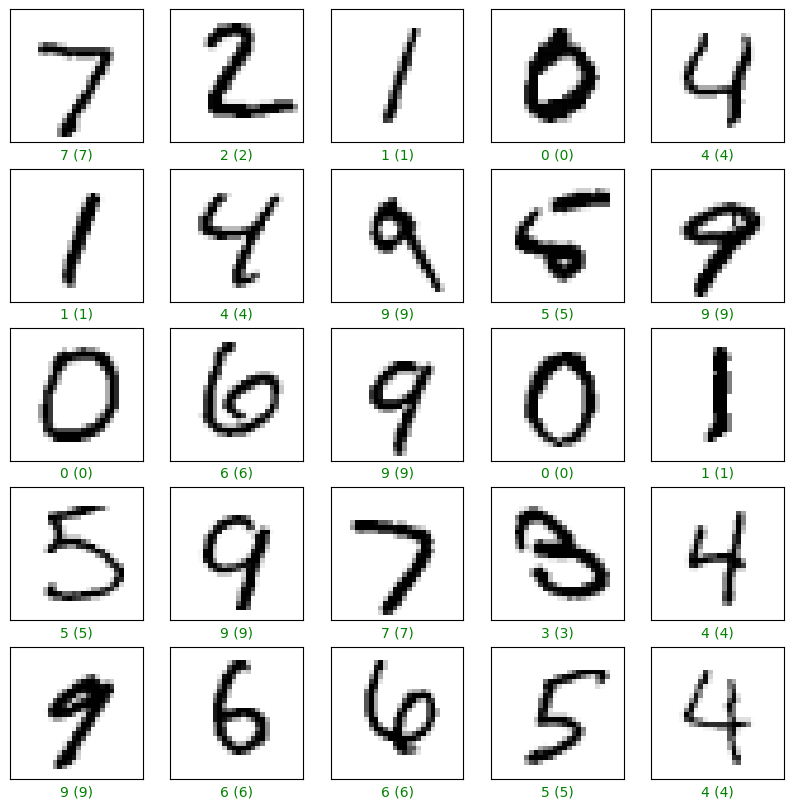

In [13]:
# Affichage de quelques prédictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(predicted_label, true_label), color=color)
plt.show()

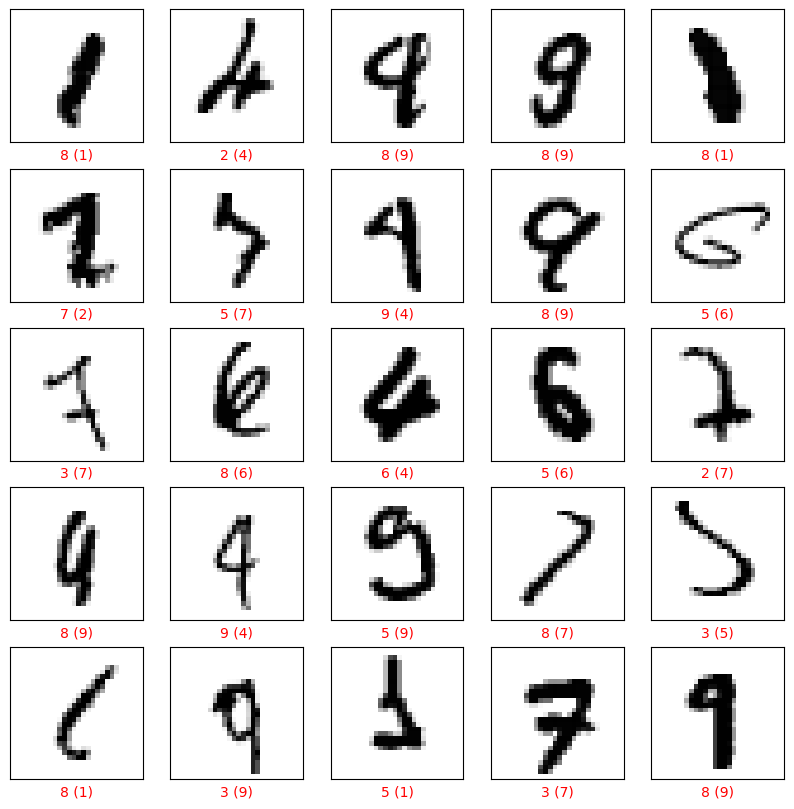

In [16]:
# Affichage des mauvaises prédictions seulement
plt.figure(figsize=(10, 10))
misclassified_indices = np.where(predictions.argmax(axis=1) != y_test)[0]

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = misclassified_indices[i]
    plt.imshow(x_test[index].reshape(28, 28), cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[index])
    true_label = y_test[index]
    plt.xlabel("{} ({})".format(predicted_label, true_label), color='red')
plt.show()
